In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/cm1_csv.csv')
print(df)

      loc  v(g)  ev(g)  iv(g)      n        v     l      d      i          e  \
0     1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30   1.30       1.30   
1     1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00   1.00       1.00   
2    24.0   5.0    1.0    3.0   63.0   309.13  0.11   9.50  32.54    2936.77   
3    20.0   4.0    4.0    2.0   47.0   215.49  0.06  16.00  13.47    3447.89   
4    24.0   6.0    6.0    2.0   72.0   346.13  0.06  17.33  19.97    5999.58   
..    ...   ...    ...    ...    ...      ...   ...    ...    ...        ...   
493  47.0   3.0    1.0    3.0  256.0  1563.78  0.04  28.00  55.85   43785.90   
494  24.0   4.0    3.0    3.0  107.0   587.63  0.05  19.13  30.72   11241.58   
495  82.0  11.0    3.0   10.0  475.0  3155.83  0.02  44.71  70.59  141084.24   
496  10.0   2.0    1.0    1.0   32.0   150.41  0.15   6.50  23.14     977.69   
497  28.0   6.0    5.0    5.0  104.0   564.33  0.06  16.09  35.08    9078.38   

     ...  lOCode  lOComment  lOBlank  l

In [ ]:
#Fetch the column(lines of code)
print(df['loc'])

0       1.1
1       1.0
2      24.0
3      20.0
4      24.0
       ... 
493    47.0
494    24.0
495    82.0
496    10.0
497    28.0
Name: loc, Length: 498, dtype: float64


In [ ]:
print(df['loc'].head())

0     1.1
1     1.0
2    24.0
3    20.0
4    24.0
Name: loc, dtype: float64


In [ ]:
print(df['loc'].tail)

<bound method NDFrame.tail of 0       1.1
1       1.0
2      24.0
3      20.0
4      24.0
       ... 
493    47.0
494    24.0
495    82.0
496    10.0
497    28.0
Name: loc, Length: 498, dtype: float64>


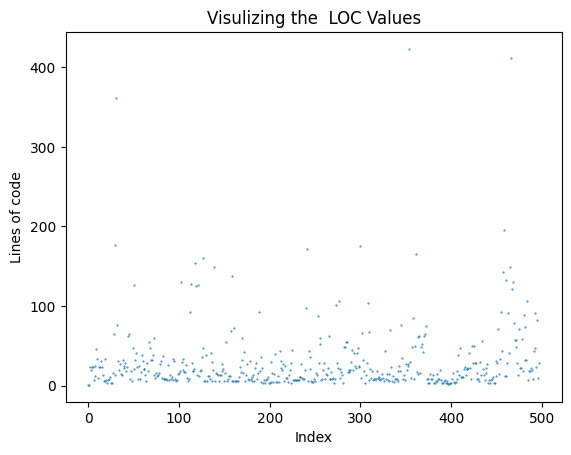

In [ ]:
import matplotlib.pyplot as plt
x= df['loc'].index
y=df['loc']
plt.scatter(x,y,s=0.2)
plt.title('Visulizing the  LOC Values')
plt.xlabel('Index')
plt.ylabel('Lines of code')
plt.show()

In [ ]:
print(df['loc'].describe())

count    498.000000
mean      29.644779
std       42.753572
min        1.000000
25%        8.000000
50%       17.000000
75%       31.000000
max      423.000000
Name: loc, dtype: float64


In [ ]:
#Cross checking the central tendency, despersion
mean=sum(df['loc']/len(df['loc']))
print(mean)

29.644779116465834


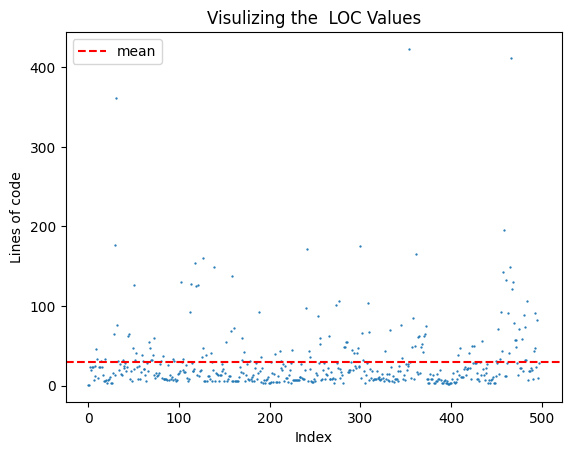

In [ ]:
#Visualizing the mean
plt.scatter(x,y,s=0.4)
plt.title('Visulizing the  LOC Values')
plt.xlabel('Index')
plt.ylabel('Lines of code')
plt.axhline(mean,color='red',linestyle='--',label='mean')
plt.legend()
plt.show()

In [ ]:
#Finding variance
var= np.var(df['loc'])
print(var)


1824.1975329833392


In [ ]:
#Finding standard deviation
std_dev= np.sqrt(var)
print(std_dev)

42.71062552788637


In [ ]:
#Finding the cofficant of variance
cv=(std_dev/mean)*100
print(cv)

144.07469645865322


##Checking for Outliers
###Outliers can be removed in many ways i-e Z- score scaling ,Using Quratiles etc. Here we will use qaurtiles.

In [ ]:
Q1 = df['loc'].quantile(0.25)
Q3 = df['loc'].quantile(0.75)
IQR = Q3 - Q1
Inter_QRange=Q3-Q1
print(Q1)
print(Q3)
print(Inter_QRange)

8.0
31.0
23.0


In [ ]:
lower_bound= Q1-1.5* Inter_QRange
print(lower_bound)
upper_bound= Q3+1.5* Inter_QRange
print(upper_bound)

-26.5
65.5


In [ ]:
outliers = df[(df['loc'] < lower_bound) | (df['loc'] > upper_bound)]['loc']
print("These values are outliers:")
print(outliers)
print("Number of outliers:", outliers.count())

These values are outliers:
29     177.0
31     361.0
32      76.0
50     127.0
102    130.0
112     93.0
113    128.0
118    154.0
119    125.0
121    127.0
126    160.0
139    149.0
157     69.0
158    138.0
161     72.0
188     92.0
240     98.0
241    172.0
253     88.0
273    101.0
276    106.0
300    176.0
302     66.0
308    104.0
309     68.0
333     70.0
345     76.0
354    423.0
358     85.0
361    165.0
372     75.0
452     71.0
455     92.0
457    143.0
458    196.0
461    133.0
463     91.0
465    149.0
466    411.0
467    121.0
468    130.0
469     79.0
475     71.0
480     89.0
482     74.0
484    107.0
492     91.0
495     82.0
Name: loc, dtype: float64
Number of outliers: 48


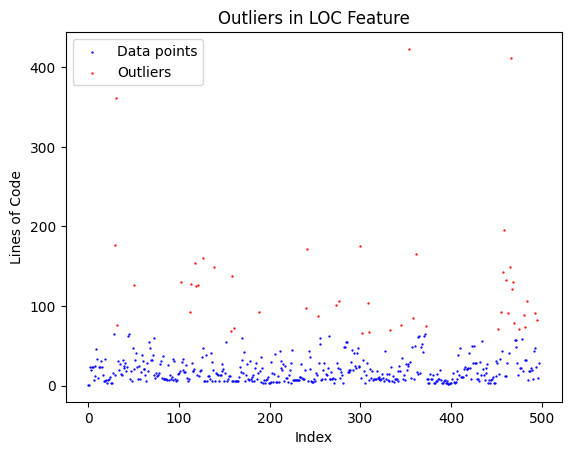

In [ ]:
# Plotting the actual data points and outliers
plt.scatter(df['loc'].index, df['loc'] , color='blue', label='Data points' , s=0.4)
plt.scatter(outliers.index, outliers, color='red', label='Outliers',s=0.4)

plt.title('Outliers in LOC Feature')
plt.xlabel('Index')
plt.ylabel('Lines of Code')
plt.legend()
plt.show()

##Deleting the Outliers

In [ ]:
# Deleting the outliers
df = df[(df['loc'] >= lower_bound) & (df['loc'] <= upper_bound)]


In [ ]:
# Calculating mean after removing outliers
mean_without_outliers = df['loc'].mean()

print("Mean without outliers:", mean_without_outliers)



Mean without outliers: 19.071333333333335
